PART-2

Loading all the required packages initially. The vgg16 model is obtained from the internet in the following github link

https://github.com/dishant-sheth/Real-Time-Facial-Recognition/blob/master/Face_recog.ipynb


In [0]:
import glob
import numpy as np                 
import os
import matplotlib.pyplot as plt
import random   
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from keras.models import Sequential,Model
from keras.layers import Dense                                     
from keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D,Dropout,Flatten,Activation
from keras.models import model_from_json
from google.colab import drive
from sklearn.cluster import KMeans
from PIL import Image

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Now, uploading the pre trained network into the program

The link for vgg16 weights.h5 is as follows

https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view

In [0]:
def vgg():
  model = Sequential()                                               
  model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))           
  model.add(Convolution2D(64, (3, 3), activation='relu'))            
  model.add(ZeroPadding2D((1,1)))                                   
  model.add(Convolution2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))                       

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(128, (3, 3), activation='relu'))           
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))           
  model.add(ZeroPadding2D((1,1)))         
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))           
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))            
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Convolution2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(Convolution2D(4096, (7, 7), activation='relu'))          
  model.add(Dropout(0.5))
  model.add(Convolution2D(4096, (1, 1), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(2622, (1, 1)))
  model.add(Flatten())
  model.add(Activation('softmax'))   
  model.load_weights('/content/drive/My Drive/vgg_face_weights.h5')
  modelresult = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
  
  return modelresult



In [0]:
model=vgg()#defining the model as the vgg16 which is pre trained


Now, loading the image folder into the program. As the model is of size 224,224, the target size of the image is changed to it inorder to avoid errors

In [0]:
#https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python/26392492
i = []
for x in glob.glob('/content/drive/My Drive/abcd/*.jpg'): 
    a=load_img(x,target_size=(224,224))
    i.append(a)
random.shuffle(i)#doing shuffling so that it doesnt take in linear order 

Now once the images are loaded, then the prediction for them are done. In order to do this, for loop is created for looking into all the images. For each loop, image are converted to array and exapansion of dimension is done and preprocess of input is done to finally predict the values using the model

In [0]:
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
p=[]                                                   
for x in i:
  n=img_to_array(x)                                                  
  b=np.expand_dims(n,axis=0)                  
  pi=imagenet_utils.preprocess_input(b)    
  pred=model.predict(pi)                         
  p.append(pred[0])         

Now, the index values of the images are to be noted. The k means clustering is used. Here the cluster is given as 3 as only 3 people images of 3 different types are considered. Once that is fitted to the predicted values, then the indexes of the images which are similarly clustered are found.

In [0]:
ind=[]                                       
k=KMeans(n_clusters=3)
k.fit(p)                                                     
lab=k.labels_                                                 
ind=lab                                                    


In [0]:
a=[]        
b=[]
c=[]

For 3 different clusters, 3 lists are generated and for each values of index 0 ,1 and 2 which are predicted using the k means, the list of a,b and c are filled. Now, the images of the same person are to be clustered together in the same list

In [0]:
for x in range(len(ind)):                                         
  if ind[x]==0:
    c.append(i[x])
  elif ind[x]==1:
    b.append(i[x])
  elif ind[x]==2:
    a.append(i[x])

Now, each of the cluster is plotted inorder to show that the model has successfully clustered the faces of the same person together.

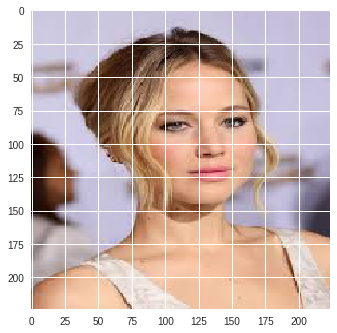

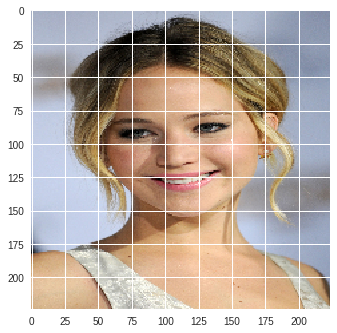

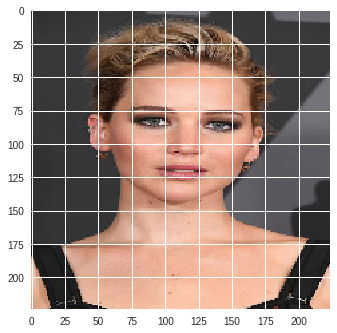

In [35]:
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
for i in range(len(a)):
  plt.imshow(a[i])
  plt.show(a[i])


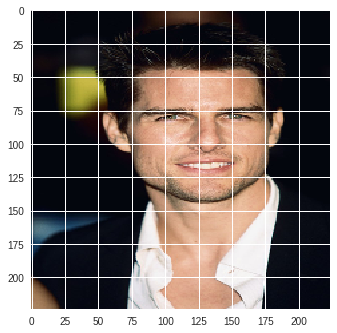

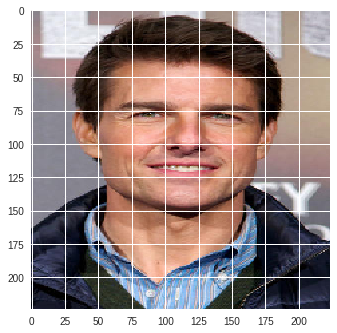

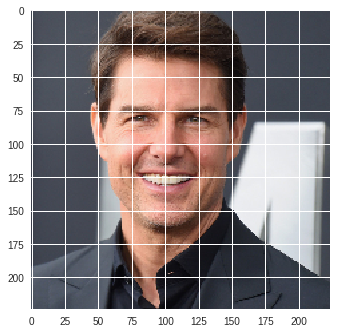

In [32]:
for i in range(len(b)):
  plt.imshow(b[i])
  plt.show()

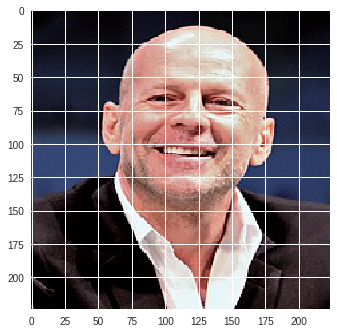

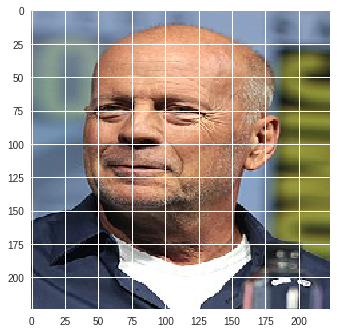

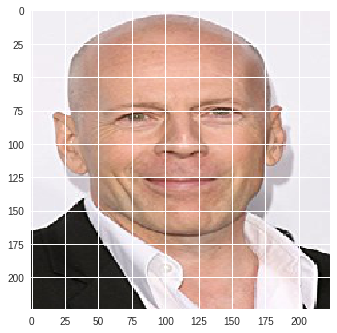

In [33]:
for i in range(len(c)):
  plt.imshow(c[i])
  plt.show()

References:

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python/26392492

https://github.com/dishant-sheth/Real-Time-Facial-Recognition/blob/master/Face_recog.ipynb

https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
